In [93]:
#######    IMPORT REQUIRED LIBRARIES   ###########
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
pd.set_option('display.max_columns', None)

In [3]:
####### READ THE DATA FROM DIRECTORY USING PANDAS ##########
data=pd.read_csv('retail_price.csv')

In [6]:
#####   Print some basic info about data ####
print('No of rows : ',data.shape[0])
print('No of columns : ',data.shape[1])

No of rows :  676
No of columns :  30


In [8]:
#####  Check for unnamed columns name and rename if required ########
data.columns


### No such Unnamed columns but some columns could use better names such as 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2','comp_3', 'ps3', 'fp3',###########


Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price'],
      dtype='object')

In [18]:
#### Chcek for Null values  ######
data.isna().sum()

####  No null values ######


product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64

 #### DATA UNDERSTANDING , EXPLORING AND ANALYSIS

In [21]:
###   Find out how many unique product are there ???
print('Number of unique products are : ' ,data.product_id.nunique())

Number of unique products are :  52


In [22]:
#####   Total number of categories   #############
print('Number of categories in the dataset : ',data.product_category_name.nunique())

Number of categories in the dataset :  9


In [30]:
########   number of product in each category   ##########
product_grouped_data=data.groupby(by=['product_category_name'])[['product_id']].agg('nunique').reset_index()
product_grouped_data

##### Garden tools and Health neauty has high number of products 

,product_category_name,product_id
0,bed_bath_table,5
1,computers_accessories,6
2,consoles_games,2
3,cool_stuff,5
4,furniture_decor,4
5,garden_tools,10
6,health_beauty,10
7,perfumery,2
8,watches_gifts,8


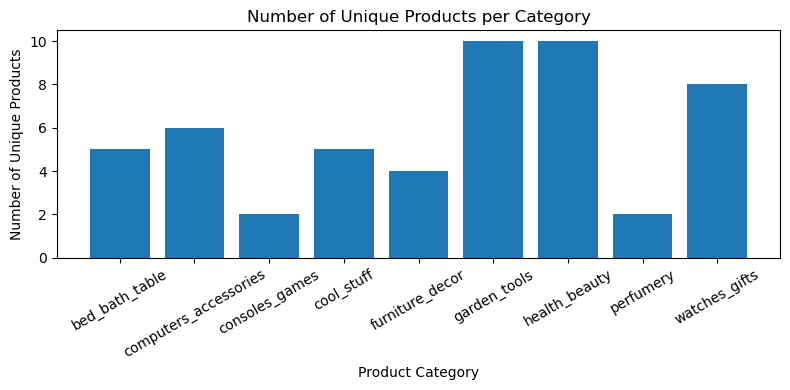

In [36]:
#########   Lets put this info in graph using bar graph  #########
categories = product_grouped_data['product_category_name']
unique_product_count = product_grouped_data['product_id']

plt.figure(figsize=(8, 4))  
plt.bar(categories, unique_product_count,)

plt.xlabel('Product Category')
plt.ylabel('Number of Unique Products')
plt.title('Number of Unique Products per Category')

plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

In [41]:
#########   Lets look at over all stats of numerical columns ###
data.describe().T

#### Since we have different categories and diffrent time periods lets analyse the data in more detail and see how stats change with respect to time and category



,count,mean,std,min,25%,50%,75%,max
qty,676.0,14.495562,15.443421,1.000000,4.000000,10.000000,18.000000,122.00
total_price,676.0,1422.708728,1700.123100,19.900000,333.700000,807.890000,1887.322500,12095.00
freight_price,676.0,20.682270,10.081817,0.000000,14.761912,17.518472,22.713558,79.76
unit_price,676.0,106.496800,76.182972,19.900000,53.900000,89.900000,129.990000,364.00
product_name_lenght,676.0,48.720414,9.420715,29.000000,40.000000,51.000000,57.000000,60.00
product_description_lenght,676.0,767.399408,655.205015,100.000000,339.000000,501.000000,903.000000,3006.00
product_photos_qty,676.0,1.994083,1.420473,1.000000,1.000000,1.500000,2.000000,8.00
product_weight_g,676.0,1847.498521,2274.808483,100.000000,348.000000,950.000000,1850.000000,9750.00
product_score,676.0,4.085503,0.232021,3.300000,3.900000,4.100000,4.200000,4.50
customers,676.0,81.028107,62.055560,1.000000,34.000000,62.000000,116.000000,339.00


In [44]:
#######   First lets see what is the data time priod (min and max dates)
print('Starting date of data :' ,data.month_year.min())
print('Starting date of data :' ,data.month_year.max())

#### So we have collect the 1 year data ranging from 01-01-2017  to 01-12-2017



Starting date of data : 01-01-2017
Starting date of data : 01-12-2017


In [47]:
#### we can see that data is collect every once in a month 
data.month_year.unique()

array(['01-05-2017', '01-06-2017', '01-07-2017', '01-08-2017',
       '01-09-2017', '01-10-2017', '01-11-2017', '01-12-2017',
       '01-01-2018', '01-02-2018', '01-03-2018', '01-04-2018',
       '01-05-2018', '01-06-2018', '01-07-2018', '01-08-2018',
       '01-03-2017', '01-04-2017', '01-02-2017', '01-01-2017'],
      dtype=object)

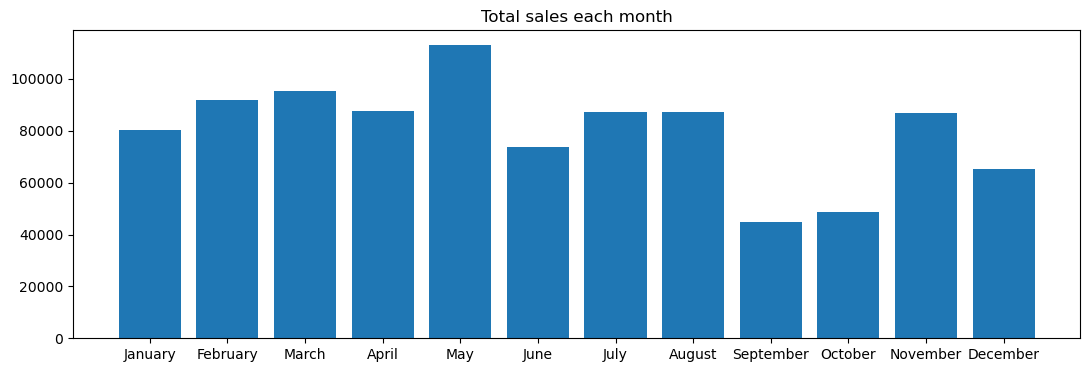

In [65]:
######  Total sales each month
data['DATE']=pd.to_datetime(data.month_year,format='%d-%m-%Y')
data['MONTH']=data.DATE.dt.month_name()
month=[
    'January', 'February', 'March', 'April',
    'May', 'June', 'July', 'August',
    'September', 'October', 'November', 'December']
data['MONTH']=pd.Categorical(data['MONTH'],categories=month)
months=data.groupby(by=['MONTH'])[['total_price']].sum().reset_index().sort_values(by='MONTH')['MONTH']
total_price=data.groupby(by=['MONTH'])[['total_price']].sum().reset_index().sort_values(by='MONTH')['total_price']
plt.figure(figsize=(13,4))
plt.bar(months,total_price)
plt.title('Total sales each month')
plt.show()

In [71]:
####### top 3 categories with highest sales every month 
top_sales=data.groupby(by=['MONTH','product_category_name'])[['total_price']].sum().reset_index().sort_values(by=['MONTH','total_price'],ascending=[True,False]).groupby('MONTH').head(3)

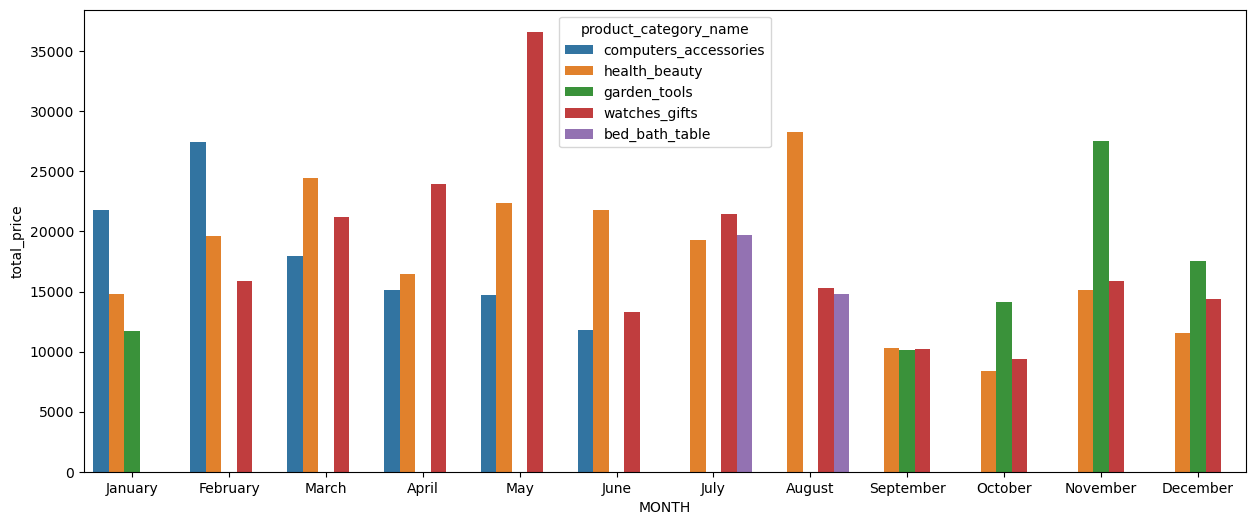

In [79]:
plt.figure(figsize=(15,6))
sns.barplot(data=top_sales,x=top_sales['MONTH'],y=top_sales['total_price'],hue=top_sales['product_category_name'],)
plt.show()

In [85]:

######## Find out Highest selling product  across all the categories #########
data.groupby(by=['product_id'])[['total_price']].sum().reset_index().max()


product_id     watches8
total_price     63885.0
dtype: object

In [91]:
#########  Findout highest selling product every month
data.groupby(by=['MONTH','product_id'])[['total_price']].sum().reset_index().sort_values(by=['MONTH','total_price'],ascending=[True,False]).groupby(by=['MONTH']).head(1)

,MONTH,product_id,total_price
19,January,furniture2,8538.00
62,February,computers6,10343.10
138,March,health2,9125.00
205,April,watches6,8961.49
257,May,watches6,11820.20
261,June,bed2,6422.60
316,July,bed5,12095.00
398,August,health2,11190.00
420,September,bed5,5222.36
505,October,health5,3499.00


In [95]:
###########  Distribution of product prices
px.histogram(data_frame=data,x=data['unit_price'],color=data['product_category_name'])

